In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from typing import List, Union
import numpy as np

cmap = ListedColormap([
        '#000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
def plot_task(
    task: dict,
    title: str = None
) -> None:
    """
    displays a task with training examples and test and train inputs
    """
  
    norm = Normalize(vmin=0, vmax=9)
    args = {'cmap': cmap, 'norm': norm}
    
    # Combine train and test examples
    train_examples = task['train']
    test_examples = task['test']
    
    # Calculate total width needed
    train_width = len(train_examples)
    test_width = len(test_examples)
    total_width = train_width + test_width
    
    height = 2  # Always 2 rows (input and output)
    figure_size = (total_width * 3, height * 3)
    figure, axes = plt.subplots(height, total_width, figsize=figure_size)
    
    # Handle single example case
    if total_width == 1:
        axes = axes.reshape(2, 1)
    
    column = 0
    
    # Plot training examples
    for example in train_examples:
        # Get grid dimensions
        input_height, input_width = len(example['input']), len(example['input'][0])
        output_height, output_width = len(example['output']), len(example['output'][0])
        
        # Plot the grids
        axes[0, column].imshow(example['input'], **args)
        axes[1, column].imshow(example['output'], **args)
        
        # Add dimension labels
        axes[0, column].set_title(f'Train Input: {input_height}×{input_width}', fontsize=10)
        axes[1, column].set_title(f'Train Output: {output_height}×{output_width}', fontsize=10)
        
        axes[0, column].axis('off')
        axes[1, column].axis('off')
        column += 1
    
    # Plot test examples
    for example in test_examples:
        # Get grid dimensions
        input_height, input_width = len(example['input']), len(example['input'][0])
                
        # Plot the grids
        axes[0, column].imshow(example['input'], **args)
        
      
        
        # Add dimension labels
        axes[0, column].set_title(f'Test Input: {input_height}×{input_width}', fontsize=10)
        
        axes[0, column].axis('off')
        axes[1, column].axis('off')
        column += 1
    
    if title is not None:
        figure.suptitle(title, fontsize=20)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


def plot_figure(task: List[List[int]], title: str = None) -> None:
    """
    displays a single 2D list (grid)
    """
    height = len(task)
    width = len(task[0]) if height > 0 else 0
    
    # Create figure with appropriate size
    fig_size = (max(width * 0.5, 4), max(height * 0.5, 3))
    figure, axes = plt.subplots(1, 1, figsize=fig_size)
    
    # Plot the grid
    norm = Normalize(vmin=0, vmax=9)
    args = {'cmap': cmap, 'norm': norm}
    axes.imshow(task, **args)
    
    # Add title and labels
    if title is not None:
        axes.set_title(title, fontsize=16)
    axes.set_title(f'Grid: {height}×{width}', fontsize=12)
    
    # Remove axis ticks
    axes.set_xticks([])
    axes.set_yticks([])
    
    plt.tight_layout()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_task_with_prediction(task, prediction, solution, title=None):
    """
    Visualize ARC task with 3 rows:
      Row 1: Input
      Row 2: Model Prediction
      Row 3: Ground Truth (from 'solution' list)
    Works for both training and test examples.
    """
    cmap = "tab20"
    norm = Normalize(vmin=0, vmax=9)
    args = {'cmap': cmap, 'norm': norm}
    
    train_examples = task.get('train', [])
    test_examples = task.get('test', [])
    
    total_examples = len(train_examples) + len(test_examples)
    fig, axes = plt.subplots(3, total_examples, figsize=(total_examples * 3, 9))
    
    # Handle case when there's only one example
    if total_examples == 1:
        axes = axes.reshape(3, 1)
    
    col = 0
    
    # ---------------- TRAIN EXAMPLES ----------------
    for ex in train_examples:
        inp = np.array(ex['input'])
        out = np.array(ex['output'])
        
        axes[0, col].imshow(inp, **args)
        axes[1, col].imshow(out, **args)
        axes[2, col].axis('off')  # No prediction for train
        
        axes[0, col].set_title("Train Input", fontsize=10)
        axes[1, col].set_title("Train Output", fontsize=10)
        
        for row in range(3):
            axes[row, col].axis('off')
        col += 1
    
    # ---------------- TEST EXAMPLES ----------------
    for i, ex in enumerate(test_examples):
        inp = np.array(ex['input'])
        pred = np.array(prediction)
        sol = np.array(solution)
        
        # If prediction has shape (1, H, W), remove leading dim
        if pred.ndim == 3 and pred.shape[0] == 1:
            pred = pred[0]
        if sol.ndim == 3 and sol.shape[0] == 1:
            sol = sol[0]
        
        axes[0, col].imshow(inp, **args)
        axes[2, col].imshow(pred, **args)
        axes[1, col].imshow(sol, **args)
        
        axes[0, col].set_title("Test Input", fontsize=10)
        axes[2, col].set_title("Prediction", fontsize=10)
        axes[1, col].set_title("Ground Truth", fontsize=10)
        
        for row in range(3):
            axes[row, col].axis('off')
        col += 1
    
    if title:
        fig.suptitle(title, fontsize=16)
    
    plt.tight_layout()
    plt.show()



In [ ]:



# eval_challenges contains the training and test examples. Break the challenge such that only one test example is present per challenge for easier visualization.
# new_eval_challenges = {}
# for key, challenge in eval_challenges.items():
#     if len(challenge['test']) > 1:
#         for i, test_example in enumerate(challenge['test']):
#             new_chal = {}
#             new_chal["test"] = [test_example]
#             new_chal["train"] = challenge['train']
#             new_key = f"{key}_test{i}"
#             new_eval_challenges[new_key] = new_chal
#     else:
#         new_eval_challenges[key] = challenge

# new_eval_solutions = {}
# for key,solution in eval_solutions.items():
#     if len(solution) > 1:
#         for i, sol in enumerate(solution):
#             new_key = f"{key}_test{i}"
#             new_eval_solutions[new_key] = solution
#     else:
#         new_eval_solutions[key] = solution
# #save the new challenges in file
# with open(os.path.join('..', 'data','arc-agi-2025','evaluation', 'arc-agi_evaluation_challenges_single_test.json'), 'w') as f:
#     json.dump(new_eval_challenges, f, indent=4)

# with open(os.path.join('..', 'data','arc-agi-2025','evaluation', 'arc-agi_evaluation_solutions_single_test.json'), 'w') as f:
#     json.dump(eval_solutions, f, indent=4)


    

        

FileNotFoundError: [Errno 2] No such file or directory: '../data/arc-agi-2025/evaluation/arc-agi_evaluation_challenges_single_test.json'

{'train': [{'input': [[3, 5, 3, 3, 6, 6, 5, 4, 1, 4, 9, 9, 4, 3, 9, 9, 9, 9, 3, 4, 9, 9, 4, 1, 4, 5, 6, 6, 3, 3], [5, 3, 3, 3, 6, 6, 4, 5, 4, 1, 9, 9, 3, 4, 9, 1, 1, 9, 4, 3, 9, 9, 1, 4, 5, 4, 6, 6, 3, 3], [1, 1, 3, 5, 5, 4, 6, 6, 9, 1, 1, 4, 9, 9, 4, 5, 5, 4, 9, 9, 4, 1, 1, 9, 6, 6, 4, 5, 5, 3], [1, 1, 5, 3, 4, 5, 6, 6, 1, 9, 4, 1, 9, 1, 4, 4, 4, 4, 1, 9, 1, 4, 9, 1, 6, 6, 5, 4, 3, 5], [6, 9, 9, 9, 3, 5, 3, 3, 4, 3, 9, 9, 9, 2, 6, 9, 9, 6, 2, 9, 9, 9, 3, 4, 3, 3, 5, 3, 9, 9], [9, 6, 9, 9, 5, 3, 3, 3, 3, 4, 9, 1, 9, 9, 9, 6, 6, 9, 9, 9, 1, 9, 4, 3, 3, 3, 3, 5, 9, 9], [9, 9, 6, 9, 1, 1, 3, 5, 9, 9, 4, 4, 6, 9, 9, 2, 2, 9, 9, 6, 4, 4, 9, 9, 5, 3, 1, 1, 9, 6], [9, 9, 9, 6, 1, 1, 5, 3, 9, 1, 5, 4, 9, 6, 9, 9, 9, 9, 6, 9, 4, 5, 1, 9, 3, 5, 1, 1, 6, 9], [1, 4, 9, 1, 4, 3, 9, 9, 5, 5, 7, 2, 4, 3, 2, 4, 4, 2, 3, 4, 2, 7, 5, 5, 9, 9, 3, 4, 1, 9], [4, 1, 1, 9, 3, 4, 9, 1, 4, 5, 2, 7, 3, 4, 4, 2, 2, 4, 4, 3, 7, 2, 5, 4, 1, 9, 4, 3, 9, 1], [9, 9, 1, 4, 9, 9, 4, 5, 6, 4, 5, 5, 2, 4, 4, 3, 3, 4, 4, 

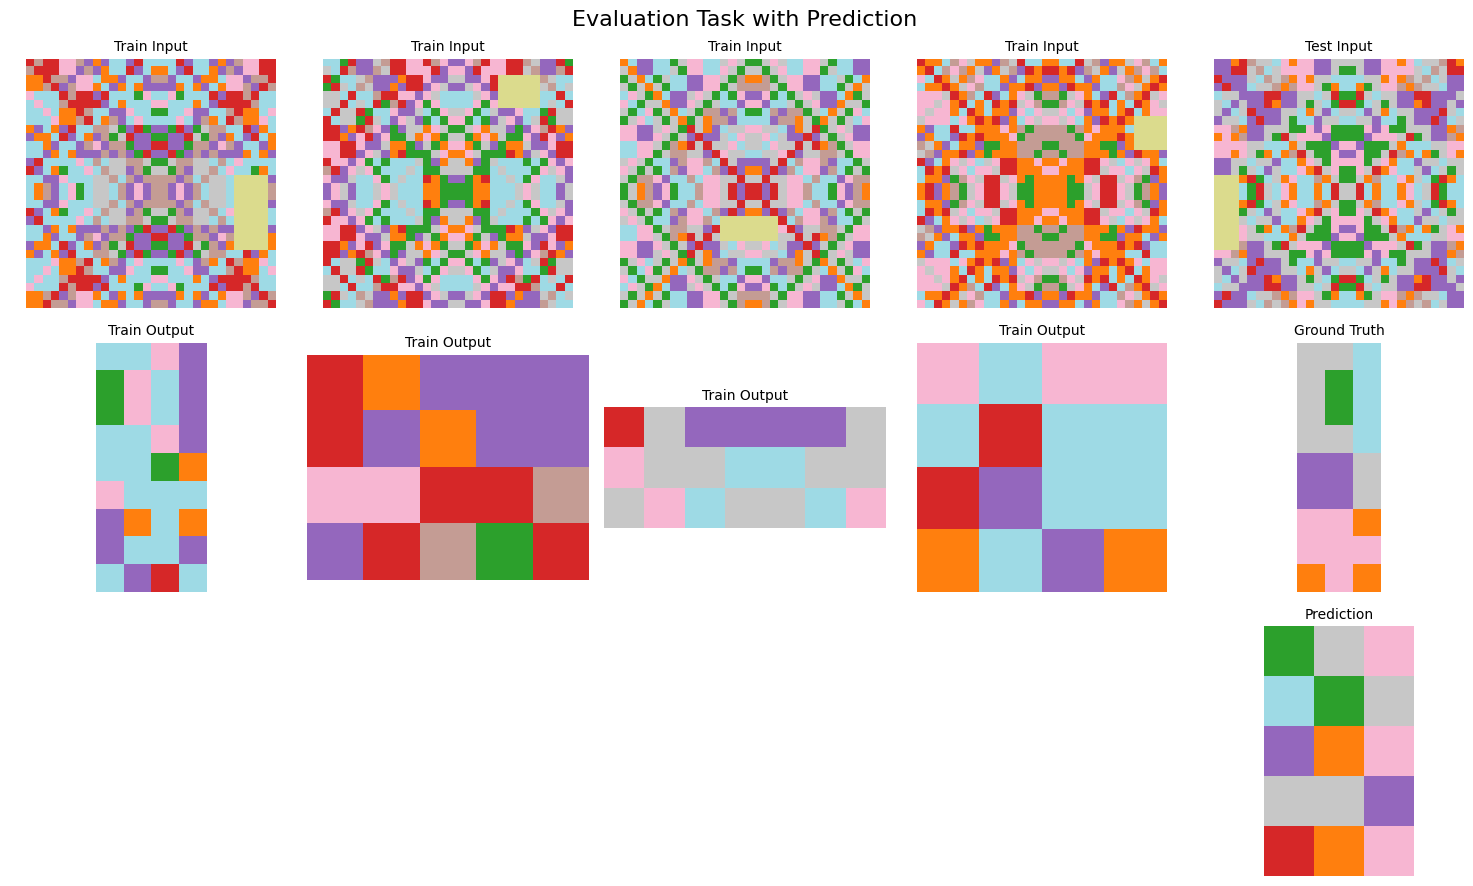

{'train': [{'input': [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [3, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]], 'output': [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 3], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]}, {'input': [[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4], [4, 2, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 2, 4], [4, 2, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 2, 4], [4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4], [4, 2, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4],

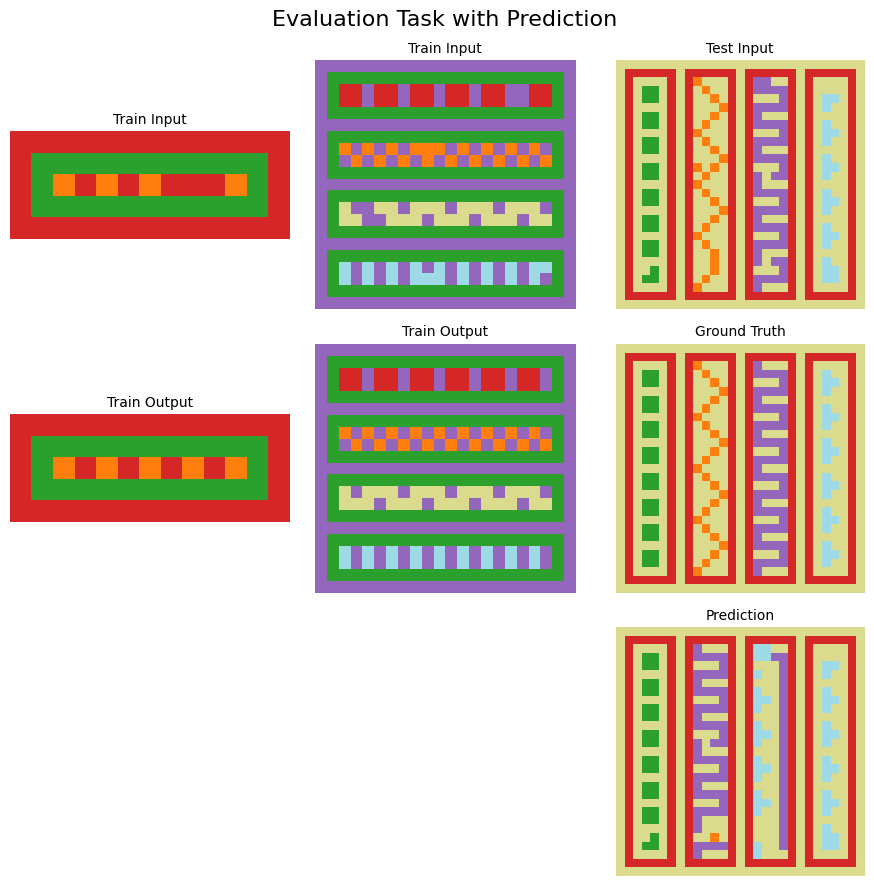

{'train': [{'input': [[2, 0, 2, 0, 6, 0, 6, 4, 0, 5, 0, 0, 0, 0, 0], [2, 0, 2, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 3, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 6, 0, 6, 4, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [6, 0, 6, 0, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 6, 0, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0], [0, 6, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0]], 'output': [[0, 5, 0, 0, 0, 0, 0], [2, 2, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 6, 0, 0], [0, 0, 0, 0, 6, 0, 0], [0, 0, 0, 0, 6, 0, 0], [0, 0, 0, 0, 6, 0, 0], [0, 3, 3, 3, 3, 0, 0], [0, 6, 0, 0, 0, 0, 0], [0, 6, 0, 0, 0, 0, 0], [0, 1, 1

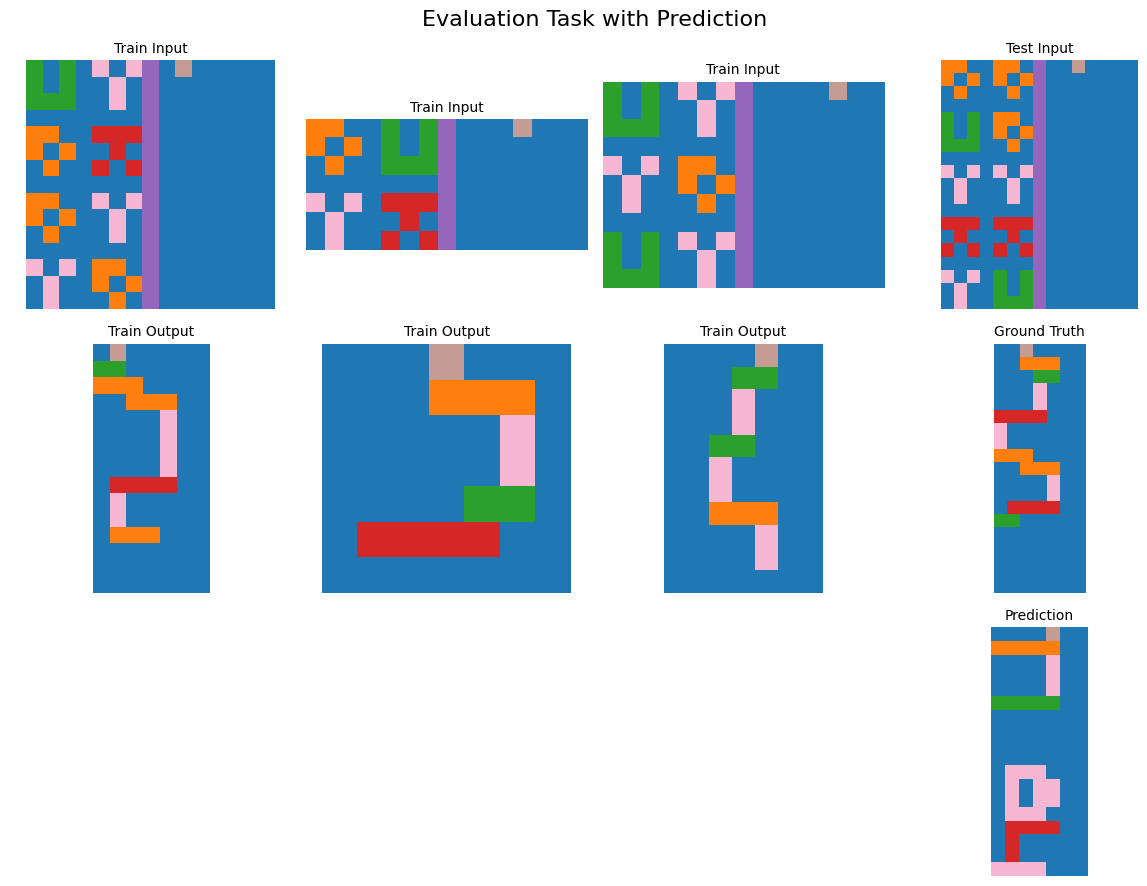

In [ ]:




# plot_figure(eval_predictions[1]["prediction"])
# # print(eval_solutions["135a2760"]['output'])


# plot_figure(img)

import json
import os

# Load evaluation solutions
eval_predictions_path = os.path.join('..', "data","arc-agi-2025","predictions","arc-agi_evaluation_predictions.json")
eval_solutions_path = os.path.join('..', "data","arc-agi-2025","processed_data_for_eval","arc-agi_evaluation_solutions.json")

eval_challenges = os.path.join('..', 'data','arc-agi-2025','processed_data_for_eval', 'arc-agi_evaluation_challenges.json')
with open(eval_predictions_path, 'r') as f:
    eval_predictions = json.load(f)
with open(eval_solutions_path, 'r') as f:
    eval_solutions = json.load(f)

with open(eval_challenges, 'r') as f:
    eval_challenges = json.load(f)

for i in range(len(eval_predictions)):
    for key, value in eval_challenges.items():
        img = np.array(eval_solutions[key])
        if img.shape[0] == 1:
            img = img[0]
        if key ==eval_predictions[i]["challenge_id"]:
            plot_task_with_prediction(
            task=value,
            prediction=eval_predictions[i]['prediction'],
            solution=img,
            title="Evaluation Task with Prediction"
            )
            break


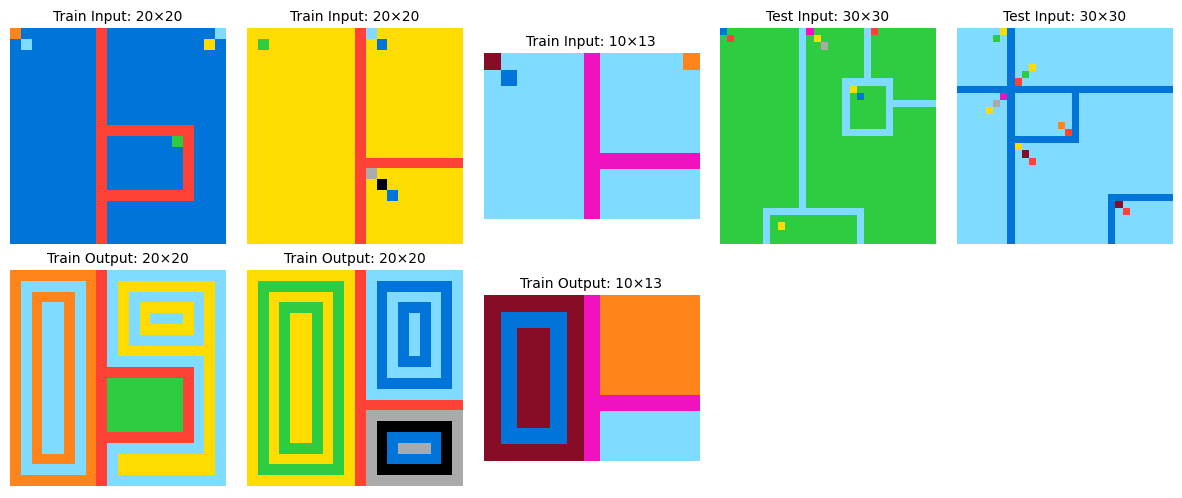

In [ ]:
plot_task(task = eval_challenges["13e47133"])